In [1]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import joblib
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Step 2: Load the Framingham Heart Study dataset

# Define the path to the CSV
data_path = r"C:\Users\bvdas\Desktop\CODING\cardio_new_project\data\framingham.csv"

# Load CSV into a DataFrame
df = pd.read_csv(data_path)

display(df.head())

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
# Step 3: Basic info about the dataset
print("Dataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB

In [4]:
# Step 4: Statistical summary of numeric columns
print("Statistical Summary:")
display(df.describe())

Statistical Summary:


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [5]:
# Step 5: Check missing values
missing = df.isnull().sum()
print("Missing values in each column:")
print(missing)

Missing values in each column:
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


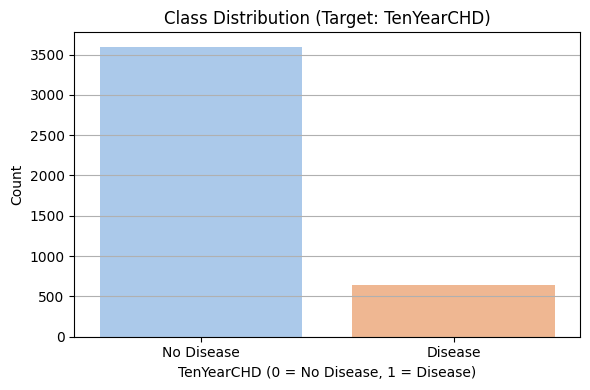

In [6]:
# Step 6: Visualize class distribution
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot
plt.figure(figsize=(6, 4))
sns.countplot(x='TenYearCHD', data=df, palette='pastel')
plt.title("Class Distribution (Target: TenYearCHD)")
plt.xlabel("TenYearCHD (0 = No Disease, 1 = Disease)")
plt.ylabel("Count")
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [7]:
# Step 7: Handle missing values

# Fill 'education' with mode (most common value)
df['education'] = df['education'].fillna(df['education'].mode()[0])

# Fill numeric columns with median (less affected by outliers)
for col in ['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']:
    df[col] = df[col].fillna(df[col].median())

# Fill 'BPMeds' with 0 (assumption: not on medication)
df['BPMeds'] = df['BPMeds'].fillna(0)

# Confirm no missing values remain
print("Total missing values left:", df.isnull().sum().sum())


Total missing values left: 0


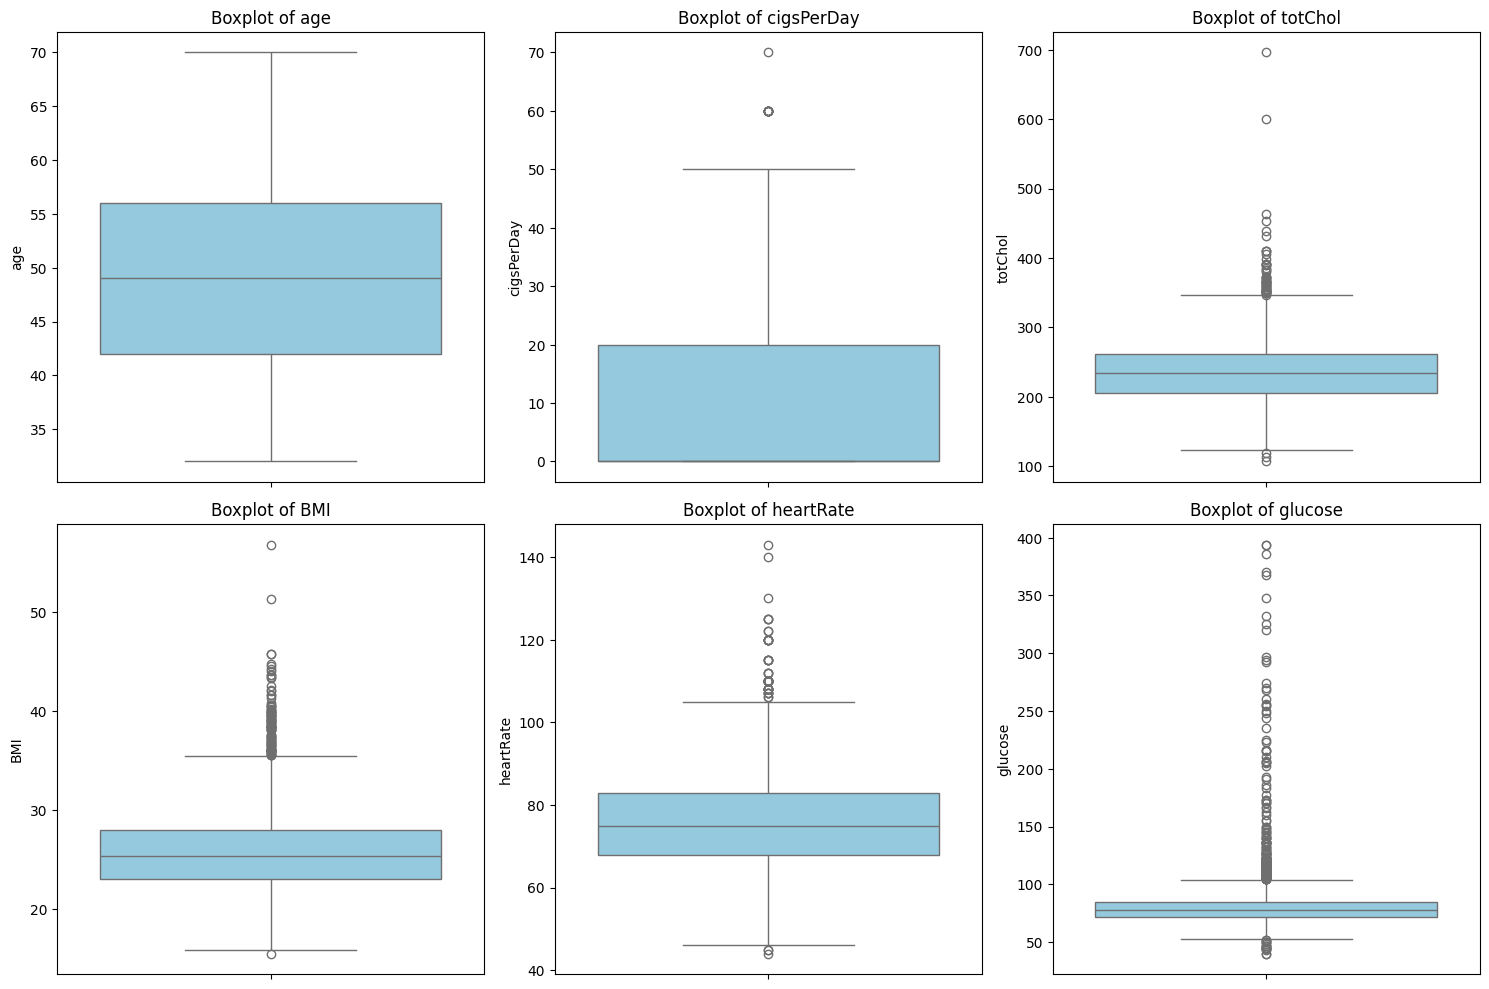

In [8]:
# Step 8: Detecting Outliers Using Boxplots
# List of numeric columns to inspect
num_cols = ['age', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']

# Plot boxplots for each numeric column
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [9]:
# Step 9: Handling Outliers with IQR Clipping

# Define columns to apply clipping
columns_to_clip = ['age', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']

for col in columns_to_clip:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

print("Outliers clipped using IQR method.")

Outliers clipped using IQR method.


In [10]:
# Step 10: Label Encoding for 'education' (ordinal feature)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['education'] = le.fit_transform(df['education'])

print("Encoding completed for 'education'.")

Encoding completed for 'education'.


In [11]:
# Step 11: Scaling features

from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# Initialize and apply scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Feature scaling complete.")


Feature scaling complete.


In [12]:
# Step 12: Split data into training and test sets

from sklearn.model_selection import train_test_split

# Split scaled features and target
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train/Test split complete.")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples : {X_test.shape[0]}")


Train/Test split complete.
Training samples: 3392
Testing samples : 848


In [13]:
# Step 13: Build and train MLP model using Keras

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
mlp_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Train the model
history = mlp_model.fit(X_train, y_train,
                        epochs=30,
                        batch_size=32,
                        validation_data=(X_test, y_test),
                        verbose=1)

Epoch 1/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8259 - loss: 0.4904 - val_accuracy: 0.8502 - val_loss: 0.4027
Epoch 2/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8489 - loss: 0.3924 - val_accuracy: 0.8479 - val_loss: 0.3999
Epoch 3/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8486 - loss: 0.3976 - val_accuracy: 0.8455 - val_loss: 0.4039
Epoch 4/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8500 - loss: 0.3999 - val_accuracy: 0.8502 - val_loss: 0.3997
Epoch 5/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8571 - loss: 0.3736 - val_accuracy: 0.8384 - val_loss: 0.4099
Epoch 6/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8505 - loss: 0.3831 - val_accuracy: 0.8514 - val_loss: 0.4016
Epoch 7/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8556 - loss: 0.3791 - val_accuracy: 0.8432 - val_loss: 0.4009
Epoch 8/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8532 - loss: 0.3808 - val_accuracy: 0.

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
MLP Model Evaluation Metrics:
Accuracy     : 0.8432
Precision    : 0.3889
Recall       : 0.0543
F1 Score     : 0.0952
ROC AUC      : 0.6744
Sensitivity  : 0.0543
Specificity  : 0.9847


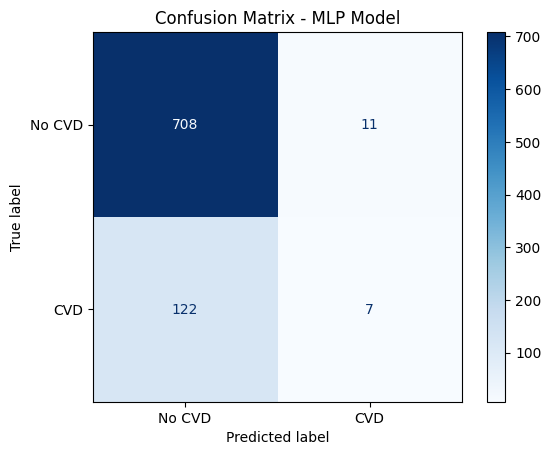

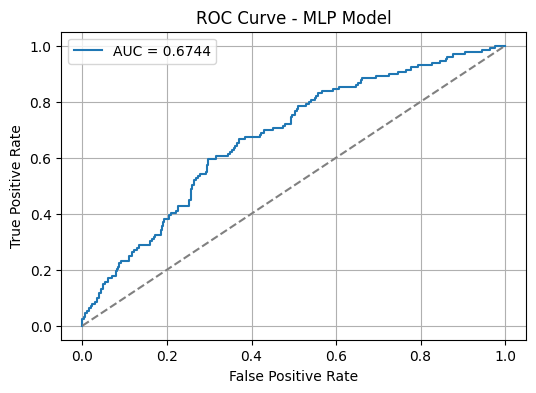

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve

# Step 14: Evaluate on Test Data
y_pred_prob = mlp_model.predict(X_test).ravel()
y_pred = (y_pred_prob >= 0.5).astype(int)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Print metrics
print("MLP Model Evaluation Metrics:")
print(f"Accuracy     : {accuracy:.4f}")
print(f"Precision    : {precision:.4f}")
print(f"Recall       : {recall:.4f}")
print(f"F1 Score     : {f1:.4f}")
print(f"ROC AUC      : {roc_auc:.4f}")
print(f"Sensitivity  : {sensitivity:.4f}")
print(f"Specificity  : {specificity:.4f}")

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No CVD", "CVD"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - MLP Model")
plt.show()

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - MLP Model")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from ctgan import CTGAN
import pandas as pd

# Separate class 1 (positive) samples
df_positive = df[df['TenYearCHD'] == 1].copy()

# Drop target column before GAN training
df_positive_nolabel = df_positive.drop('TenYearCHD', axis=1)

print("Positive class shape:", df_positive_nolabel.shape)

Positive class shape: (644, 15)


In [ ]:
# Count how many class 0 samples are there
count_class_0 = df[df['TenYearCHD'] == 0].shape[0]
print("Class 0 count (target):", count_class_0)

# Train CTGAN model
ctgan = CTGAN(epochs=300)
ctgan.fit(df_positive_nolabel)

# Generate synthetic samples to match class 0
synthetic_data = ctgan.sample(count_class_0)
synthetic_data['TenYearCHD'] = 1  # Add label back

print("Synthetic Class 1 samples generated:", synthetic_data.shape)


Class 0 count (target): 3596
Synthetic Class 1 samples generated: (3596, 16)


In [17]:
#NEW
from sklearn.utils import shuffle

# Combine original data with synthetic class 1 samples
df_balanced = pd.concat([df[df['TenYearCHD'] == 0], synthetic_data], axis=0)

# Shuffle the balanced dataset
df_balanced = shuffle(df_balanced, random_state=42).reset_index(drop=True)

# Save to CSV
df_balanced.to_csv(r"C:\Users\bvdas\Desktop\CODING\cardio_new_project\data\framingham_balanced_mlp_2.csv", index=False)

print("Balanced dataset saved as 'framingham_balanced_rf.csv'")
print("Shape of new dataset:", df_balanced.shape)
print("New class distribution:\n", df_balanced['TenYearCHD'].value_counts())


Balanced dataset saved as 'framingham_balanced_rf.csv'
Shape of new dataset: (7192, 16)
New class distribution:
 TenYearCHD
1    3596
0    3596
Name: count, dtype: int64


In [26]:
synthetic_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,54,1,0,17.751107,-0.004007,0,0,0,220.256036,156.624089,77.780540,29.044669,85.723716,94.973206,1
1,1,69,1,1,18.379945,1.129012,0,0,0,200.612143,126.320147,65.106501,28.192537,101.370276,88.001997,1
2,1,69,0,0,19.377913,0.687776,0,1,0,234.831135,194.311849,66.884749,19.329631,65.518030,65.128961,1
3,1,57,0,1,-2.128476,-0.013840,0,1,0,349.338668,128.974857,98.382530,19.956453,78.708388,97.048675,1
4,0,58,0,0,-1.622945,-0.002317,0,0,0,274.008940,217.375221,55.441879,18.904042,51.425070,73.791169,1


In [27]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000
mean,0.563821,55.001112,0.828281,0.528782,10.404471,0.128657,0.004867,0.276001,0.115545,222.305532,141.860488,80.846339,24.731799,70.668759,76.988161,0.500000
std,0.495945,10.492953,0.914882,0.499206,12.241847,0.320490,0.082404,0.447048,0.319701,49.808627,31.305479,15.313890,4.502882,13.031208,12.861634,0.500035
min,0.000000,32.000000,0.000000,0.000000,-5.534461,-0.038531,0.000000,0.000000,0.000000,76.628694,75.484790,40.909896,12.694945,40.882191,40.831839,0.000000
25%,0.000000,46.000000,0.000000,0.000000,0.000000,-0.001908,0.000000,0.000000,0.000000,188.052101,119.312711,70.748940,21.790000,61.091150,69.000000,0.000000
50%,1.000000,55.000000,1.000000,1.000000,5.412868,0.000000,0.000000,0.000000,0.000000,222.430925,135.000000,80.000000,24.732325,70.000000,77.000000,0.500000
75%,1.000000,64.000000,1.000000,1.000000,19.957461,0.000000,0.000000,1.000000,0.000000,255.000000,158.524850,89.500000,27.723145,79.038803,84.801182,1.000000
max,1.000000,76.000000,4.000000,1.000000,61.717648,1.447617,2.000000,1.000000,1.000000,399.191711,259.938126,149.420655,42.282201,111.989705,116.867992,1.000000


In [18]:
# Load the balanced dataset
balanced_path = r"C:\Users\bvdas\Desktop\CODING\cardio_new_project\data\framingham_balanced_mlp_2.csv"
df = pd.read_csv(balanced_path)

# Check shape and class distribution
print("Shape:", df.shape)
print("Class Distribution:\n", df["TenYearCHD"].value_counts())

# Split features and target
X = df.drop("TenYearCHD", axis=1)
y = df["TenYearCHD"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Shape: (7192, 16)
Class Distribution:
 TenYearCHD
1    3596
0    3596
Name: count, dtype: int64
Train shape: (5753, 15)
Test shape: (1439, 15)


In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Build model
model_balanced = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile model
model_balanced.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Add early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train
history_balanced = model_balanced.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7937 - loss: 0.4472 - val_accuracy: 0.9117 - val_loss: 0.2165
Epoch 2/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9140 - loss: 0.2100 - val_accuracy: 0.9298 - val_loss: 0.1757
Epoch 3/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9273 - loss: 0.1848 - val_accuracy: 0.9409 - val_loss: 0.1543
Epoch 4/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9346 - loss: 0.1641 - val_accuracy: 0.9444 - val_loss: 0.1355
Epoch 5/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9475 - loss: 0.1349 - val_accuracy: 0.9500 - val_loss: 0.1254
Epoch 6/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9560 - loss: 0.1204 - val_accuracy: 0.9534 - val_loss: 0.1160
Epoch 7/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9543 - loss: 0.1255 - val_accuracy: 0.9555 - val_loss: 0.1178
Epoch 8/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9544 - loss: 0.1180 - val_accuracy: 0.

In [20]:
print("Balanced dataset shape:", df_balanced.shape)
print("\nSample rows:")
display(df_balanced.head())

# Check class distribution
print("\nClass distribution:")
print(df_balanced['TenYearCHD'].value_counts())


Balanced dataset shape: (7192, 16)

Sample rows:


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,68,0,0,9.337936,-0.024892,0,0,0,174.271870,142.501415,57.500863,26.349545,49.766879,56.450428,1
1,0,53,0,0,2.111889,0.950723,0,1,1,191.462336,139.476322,59.150148,33.497387,68.353620,56.202667,1
2,1,74,0,1,1.261250,-0.003592,0,0,0,312.703490,119.444939,59.470134,18.533663,62.927012,74.068115,1
3,0,58,1,0,40.258909,-0.017993,0,0,0,161.504783,141.702760,80.759879,24.097953,43.695615,87.678741,1
4,0,52,0,1,20.000000,1.000000,0,1,0,161.000000,180.000000,114.000000,32.520000,105.000000,104.000000,0



Class distribution:
TenYearCHD
1    3596
0    3596
Name: count, dtype: int64


In [21]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000,7192.000000
mean,0.563821,55.001112,0.828281,0.528782,10.404471,0.128657,0.004867,0.276001,0.115545,222.305532,141.860488,80.846339,24.731799,70.668759,76.988161,0.500000
std,0.495945,10.492953,0.914882,0.499206,12.241847,0.320490,0.082404,0.447048,0.319701,49.808627,31.305479,15.313890,4.502882,13.031208,12.861634,0.500035
min,0.000000,32.000000,0.000000,0.000000,-5.534461,-0.038531,0.000000,0.000000,0.000000,76.628694,75.484790,40.909896,12.694945,40.882191,40.831839,0.000000
25%,0.000000,46.000000,0.000000,0.000000,0.000000,-0.001908,0.000000,0.000000,0.000000,188.052101,119.312711,70.748940,21.790000,61.091150,69.000000,0.000000
50%,1.000000,55.000000,1.000000,1.000000,5.412868,0.000000,0.000000,0.000000,0.000000,222.430925,135.000000,80.000000,24.732325,70.000000,77.000000,0.500000
75%,1.000000,64.000000,1.000000,1.000000,19.957461,0.000000,0.000000,1.000000,0.000000,255.000000,158.524850,89.500000,27.723145,79.038803,84.801182,1.000000
max,1.000000,76.000000,4.000000,1.000000,61.717648,1.447617,2.000000,1.000000,1.000000,399.191711,259.938126,149.420655,42.282201,111.989705,116.867992,1.000000


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Predict on test set
y_pred = (model_balanced.predict(X_test) > 0.5).astype("int32")

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Sensitivity and Specificity
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Print all
print("Final Evaluation Metrics (MLP on Balanced Dataset):")
print(f"Accuracy     : {accuracy:.4f}")
print(f"Precision    : {precision:.4f}")
print(f"Recall       : {recall:.4f}")
print(f"F1 Score     : {f1:.4f}")
print(f"ROC AUC      : {roc_auc:.4f}")
print(f"Sensitivity  : {sensitivity:.4f}")
print(f"Specificity  : {specificity:.4f}")


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Final Evaluation Metrics (MLP on Balanced Dataset):
Accuracy     : 0.9625
Precision    : 0.9637
Recall       : 0.9611
F1 Score     : 0.9624
ROC AUC      : 0.9625
Sensitivity  : 0.9611
Specificity  : 0.9639


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step


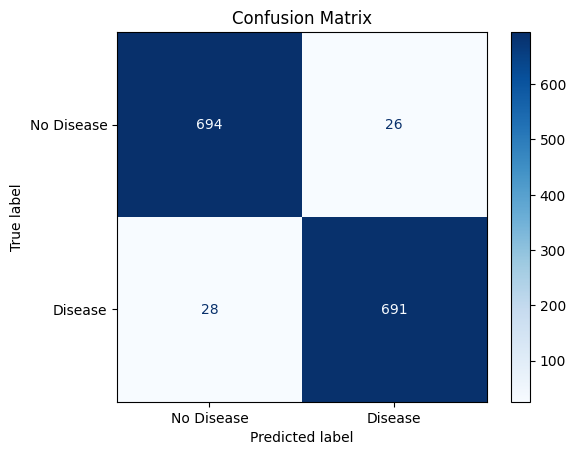

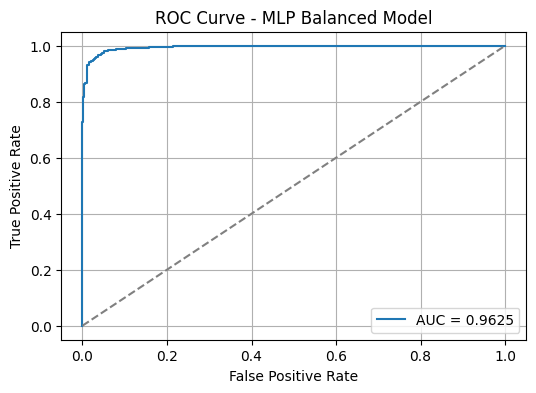

In [ ]:
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, RocCurveDisplay
)
import matplotlib.pyplot as plt
import numpy as np

# Predict probabilities
y_pred_prob = model_balanced.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - MLP Balanced Model")
plt.legend()
plt.grid(True)
plt.show()


In [24]:
import joblib

# Save the scaler
joblib.dump(scaler, r"C:\Users\bvdas\Desktop\CODING\cardio_new_project\models\scaler_balanced.pkl")
print("Scaler saved as: models/scaler_balanced.pkl")

Scaler saved as: models/scaler_balanced.pkl


In [25]:
# Save the MLP model to disk
model_balanced.save(r"C:\Users\bvdas\Desktop\CODING\cardio_new_project\models\mlp_model_balanced.keras")
print("MLP model saved as: models/mlp_model_balanced.keras")

MLP model saved as: models/mlp_model_balanced.keras
